In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle
import warnings
warnings.filterwarnings('ignore')

In [7]:
df= pd.read_csv('F://wine.data',header=None)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
with open('F://wine.names') as f:
    name= f.read()
print(name)

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [11]:
#we are just understanding the features... we are not building the model


#consider dep and indep
X= df.iloc[:,1:].values   # convert into arrays
Y= df.iloc[:,0].values

In [12]:
X.shape

(178, 13)

In [13]:
Y.shape

(178,)

In [14]:
mmx= MinMaxScaler()
sc= StandardScaler()

In [15]:
x_mmx=mmx.fit_transform(X)  # this is part of pre processing and it is normalisation,,,,,,,, # 0-1 range
x_sc=sc.fit_transform(X)# z-score

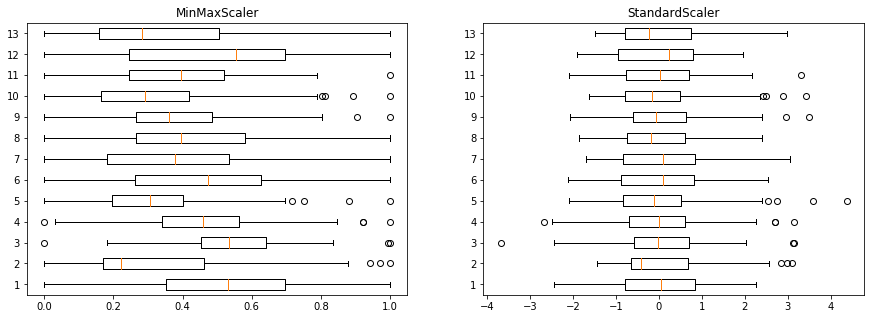

In [18]:
#visulaising the data:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(x_mmx, vert=False)
plt.title('MinMaxScaler')

plt.subplot(1,2,2)
plt.boxplot(x_sc,vert=False)
plt.title('StandardScaler')

plt.show()

### PCA Analysis

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA()

In [22]:
xpca= pca.fit_transform(x_sc)   # applying to standard Scaler array

In [24]:
xpca.shape, x_sc.shape
#xpca---> consists of X1,X2,...,X13(eigen vector) Each components as diff var(we have to understand that var)

((178, 13), (178, 13))

In [29]:
pca.explained_variance_  # this our eigen values of pca

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [34]:
evr=pca.explained_variance_ratio_  # this represents the % of var.
evr

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [31]:
#lets visualise the explained var ratio:

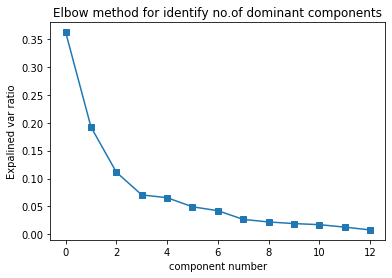

In [33]:
plt.plot(evr,'s-')
plt.xlabel('component number')
plt.ylabel('Expalined var ratio')
plt.title('Elbow method for identify no.of dominant components')
plt.show()

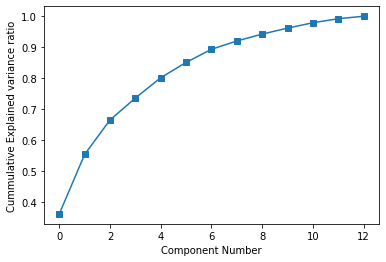

In [35]:
# applying Cummilative variance or sum:

cuv= np.cumsum(evr)
plt.plot(cuv,'s-')
plt.xlabel('Component Number')
plt.ylabel('Cummulative Explained variance ratio')
plt.show()

In [36]:
#always % ratio should be more than 80%,, so take 5 or 4 components--> it is more than 80%

In [37]:
#by components
pca1= PCA(n_components=4)

In [38]:
xpca1= pca1.fit_transform(x_sc)
xpca1.shape

(178, 4)

In [40]:
# by EVR:
pca2=PCA(0.85)  #---> this is %, depends on how much we need.
xpca2= pca2.fit_transform(x_sc)
xpca2.shape

(178, 6)